# Exercise 1: Breast Cancer Data (Binary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

<AxesSubplot:>

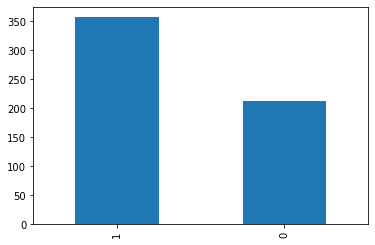

In [2]:
# Breast cancer data
from sklearn.datasets import load_breast_cancer

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
df = pd.DataFrame(data=X, columns=dataObj.feature_names)
df.insert(loc=0, column='class', value=y)

df['class'].value_counts().plot(kind='bar')

<AxesSubplot:>

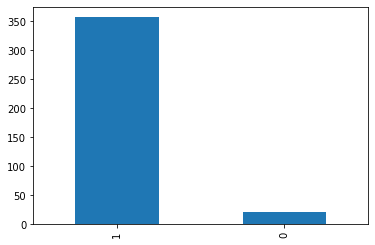

In [3]:
# Let make an imbalance dataset by sample small amount of class 0 (having cancer)
df0 = df[df['class'] == 0].sample(frac=0.10, random_state=1)
df1 = df[df['class'] == 1]
dfSample = pd.concat([df0, df1], axis=0, ignore_index=True)
dfSample['class'].value_counts().plot(kind='bar')

In [4]:
colsX = [i for i in dfSample.columns if i != 'class']
X = dfSample[colsX].values
y = dfSample['class'].values

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

# Constructing a pipeline object
pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

# Training
pipe_svc.fit(X_train, y_train)

# Prediction from test data
y_pred = pipe_svc.predict(X_test)

## Visualize confusion matrix

In [5]:
from sklearn.metrics import plot_confusion_matrix


## Calculate metrices
- Accuracy
- Precision
- Recall
- F1

In [6]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score


## Perform gridsearch on `recall`

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


## Re-evaluate the metrices

## Use `class_weight` option

## Use SMOTE